In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
import datetime

In [2]:
new_train = pd.read_csv('data/train_log.csv')
new_test = pd.read_csv('data/test_log.csv')

In [3]:
new_train.drop(columns=['enroll_id', 'object'], inplace=True)
new_test.drop(columns=['enroll_id', 'object'], inplace=True)

In [4]:
# Substitute various actions with category-type actions
video_action = ['seek_video','play_video','pause_video','stop_video','load_video']
problem_action = ['problem_get','problem_check','problem_save','reset_problem','problem_check_correct', 'problem_check_incorrect']
forum_action = ['create_thread','create_comment','delete_thread','delete_comment']
click_action = ['click_info','click_courseware','click_about','click_forum','click_progress']
close_action = ['close_courseware', 'close_forum']

video = ['video']*len(video_action)
problem = ['problem']*len(problem_action)
forum = ['forum']*len(forum_action)
click = ['click']*len(click_action)
close = ['close']*len(close_action)

video_dict = dict(zip(video_action, video))
problem_dict = dict(zip(problem_action, problem))
forum_dict = dict(zip(forum_action, forum))
click_dict = dict(zip(click_action, click))
close_dict = dict(zip(close_action, close))

new_train['action'].replace(video_dict, inplace=True)
new_train['action'].replace(problem_dict, inplace=True)
new_train['action'].replace(forum_dict, inplace=True)
new_train['action'].replace(click_dict, inplace=True)
new_train['action'].replace(close_dict, inplace=True)

new_test['action'].replace(video_dict, inplace=True)
new_test['action'].replace(problem_dict, inplace=True)
new_test['action'].replace(forum_dict, inplace=True)
new_test['action'].replace(click_dict, inplace=True)
new_test['action'].replace(close_dict, inplace=True)

### Retrieve time spent on courses from join with course_info dataframe

In [5]:
courseinfo = pd.read_csv('data/course_info.csv', index_col='id')

In [6]:
new_train = new_train.merge(courseinfo, on='course_id')
new_test = new_test.merge(courseinfo, on='course_id')

In [7]:
new_train.drop(columns=['end', 'course_type', 'category'], inplace=True)
new_test.drop(columns=['end', 'course_type', 'category'], inplace=True)

In [8]:
new_train['time']= pd.to_datetime(new_train['time'])
new_train['start']= pd.to_datetime(new_train['start'])
new_test['time']= pd.to_datetime(new_test['time'])
new_test['start']= pd.to_datetime(new_test['start'])

In [9]:
new_train['week'] = (new_train['time'] - new_train['start']).div(7)
new_test['week'] = (new_test['time'] - new_test['start']).div(7)
def to_weeks(x):
    return int(str(x)[0]) + 1
new_train['week'] = new_train['week'].transform(to_weeks)
new_test['week'] = new_test['week'].transform(to_weeks)

In [10]:
new_train.drop(columns=['start'], inplace=True)
new_test.drop(columns=['start'], inplace=True)

In [11]:
new_train

,username,course_id,session_id,action,time,week
0,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click,2015-09-27 15:42:59,1
1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click,2015-09-27 15:43:12,1
2,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,2015-10-19 19:37:42,4
3,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,2015-10-19 19:33:27,4
4,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,2015-10-19 19:33:30,4
...,...,...,...,...,...,...
29165535,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,click,2016-04-01 21:04:38,5
29165536,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,2016-04-01 21:04:38,5
29165537,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,2016-04-01 21:04:38,5
29165538,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,2016-04-01 21:04:38,5


In [12]:
new_train['time_spent']= (new_train.groupby(by=['username', 'course_id', 'week', 'session_id'])['time'].transform('max')-
             new_train.groupby(by=['username', 'course_id', 'week','session_id'])['time'].transform('min'))
new_test['time_spent']= (new_test.groupby(by=['username', 'course_id', 'week','session_id'])['time'].transform('max')-
             new_test.groupby(by=['username', 'course_id', 'week', 'session_id'])['time'].transform('min'))

In [13]:
new_test

,username,course_id,session_id,action,time,week,time_spent
0,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,video,2015-10-15 22:14:11,3,0 days 01:19:48
1,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,video,2015-10-15 22:43:35,3,0 days 01:19:48
2,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,video,2015-10-15 22:43:40,3,0 days 01:19:48
3,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,video,2015-10-15 22:55:38,3,0 days 01:19:48
4,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,video,2015-10-15 22:55:38,3,0 days 01:19:48
...,...,...,...,...,...,...,...
12944857,2513464,course-v1:TsinghuaX+AP000001X+2016_T1,b12bc83e13cd943cf61bf78f09c72158,problem,2016-03-19 21:37:15,3,0 days 00:23:04
12944858,2513464,course-v1:TsinghuaX+AP000001X+2016_T1,b12bc83e13cd943cf61bf78f09c72158,problem,2016-03-19 21:37:22,3,0 days 00:23:04
12944859,2513464,course-v1:TsinghuaX+AP000001X+2016_T1,b12bc83e13cd943cf61bf78f09c72158,problem,2016-03-19 21:37:37,3,0 days 00:23:04
12944860,2513464,course-v1:TsinghuaX+AP000001X+2016_T1,7eca0904ae14dc8af809c0362632dd8e,click,2016-03-19 19:24:44,3,0 days 00:02:12


In [14]:
new_train.drop(columns=['time'], inplace=True)
new_test.drop(columns=['time'], inplace=True)

In [15]:
new_train

,username,course_id,session_id,action,week,time_spent
0,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click,1,0 days 00:00:13
1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click,1,0 days 00:00:13
2,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,4,0 days 00:05:56
3,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,4,0 days 00:05:56
4,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,video,4,0 days 00:05:56
...,...,...,...,...,...,...
29165535,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,click,5,0 days 00:16:19
29165536,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,5,0 days 00:16:19
29165537,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,5,0 days 00:16:19
29165538,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem,5,0 days 00:16:19


#### Sum the actions over the weeks per session

In [16]:
new_train['count'] = len(new_train)*[1]
new_test['count'] = len(new_test)*[1]

In [17]:
new_train = new_train.groupby(by=['username', 'course_id', 'action', 'week', 'session_id', 'time_spent']).count().reset_index()
new_test = new_test.groupby(by=['username', 'course_id', 'action', 'week', 'session_id', 'time_spent']).count().reset_index()

In [18]:
new_train

,username,course_id,action,week,session_id,time_spent,count
0,5,TsinghuaX/60510102X/_,close,1,c4d05fdd4af11ea45bb4623b2b6fa2c4,0 days 02:54:28,1
1,5,TsinghuaX/60510102X/_,video,1,c4d05fdd4af11ea45bb4623b2b6fa2c4,0 days 02:54:28,10
2,5,TsinghuaX/70240183x/2015_T2,close,1,6ff66b03510e0dc515ea4637216f1ad3,0 days 03:55:46,3
3,5,TsinghuaX/70240183x/2015_T2,problem,1,6ff66b03510e0dc515ea4637216f1ad3,0 days 03:55:46,1
4,5,TsinghuaX/70240183x/2015_T2,video,1,6ff66b03510e0dc515ea4637216f1ad3,0 days 03:55:46,39
...,...,...,...,...,...,...,...
1100575,7023562,course-v1:TsinghuaX+AP000008X+2017T1,problem,2,e7cc94567b145a3444a1b7abb3d7ad35,0 days 07:06:36,10
1100576,7023562,course-v1:TsinghuaX+AP000008X+2017T1,video,2,e7cc94567b145a3444a1b7abb3d7ad35,0 days 07:06:36,228
1100577,7036067,course-v1:TsinghuaX+AP000008X+2017T1,click,3,faa7749b823fbdf69fd3a752598919fa,0 days 00:02:19,7
1100578,7036067,course-v1:TsinghuaX+AP000008X+2017T1,problem,3,653c4e2bd26b9f852f0da0377081baca,0 days 00:00:50,8


#### Create the Session Numbers per Week

In [19]:
sessnum_train = new_train[['username', 'course_id', 'week', 'session_id', 'time_spent']].drop_duplicates()
sessnum_test = new_test[['username', 'course_id', 'week', 'session_id', 'time_spent']].drop_duplicates()
sessnum_train['session_numbers'] = len(sessnum_train)*[1]
sessnum_test['session_numbers'] = len(sessnum_test)*[1]
sessnum_train['time_spent'] = sessnum_train.time_spent.dt.total_seconds()
sessnum_test['time_spent'] = sessnum_test.time_spent.dt.total_seconds()

In [20]:
sessnum_train = sessnum_train.groupby(by=['username', 'course_id', 'week']).sum().reset_index()
sessnum_test = sessnum_test.groupby(by=['username', 'course_id', 'week']).sum().reset_index()

In [21]:
sessnum_train

,username,course_id,week,time_spent,session_numbers
0,5,TsinghuaX/60510102X/_,1,10468.0,1
1,5,TsinghuaX/70240183x/2015_T2,1,14146.0,1
2,5,TsinghuaX/80511503X/2015_T2,4,16571.0,1
3,5,TsinghuaX/80511503X/2015_T2,5,245582.0,1
4,5,TsinghuaX/80515522X/2015_T1,5,3272.0,1
...,...,...,...,...,...
293393,7005413,course-v1:TsinghuaX+AP000008X+2017T1,1,3.0,1
293394,7011178,course-v1:TsinghuaX+AP000008X+2017T1,1,2794.0,1
293395,7019483,course-v1:TsinghuaX+20320074X+2017_T1,4,2763.0,1
293396,7023562,course-v1:TsinghuaX+AP000008X+2017T1,2,25596.0,1


In [22]:
#sum over the sessions in the activity dataset
new_train = new_train.groupby(by=['username', 'course_id', 'action', 'week']).sum().reset_index()
new_test = new_test.groupby(by=['username', 'course_id', 'action', 'week']).sum().reset_index()

In [23]:
#append session numbers to activity dataset
train = new_train.append(sessnum_train.melt(id_vars=['username', 'course_id','week'], var_name='action', value_name='count'))

test = new_test.append(sessnum_test.melt(id_vars=['username', 'course_id','week'], var_name='action', value_name='count'))

In [24]:
train['count'] = train['count'].astype('int')
test['count'] = test['count'].astype('int')

In [25]:
test

,username,course_id,action,week,count
0,5,course-v1:Tsinghua+20150001+2015_T2,click,1,14
1,5,course-v1:Tsinghua+20150001+2015_T2,close,1,3
2,5,course-v1:Tsinghua+20150001+2015_T2,video,1,12
3,5,course-v1:TsinghuaX+00740123X+2016_T1,click,5,2
4,5,course-v1:TsinghuaX+00740123X+2016_T1,video,5,5
...,...,...,...,...,...
251097,6946681,course-v1:TsinghuaX+20320074X+2017_T1,session_numbers,3,1
251098,6949671,course-v1:TsinghuaX+80000271X+2017_T1,session_numbers,5,1
251099,7006106,course-v1:TsinghuaX+AP000008X+2017T1,session_numbers,2,1
251100,7008105,course-v1:TsinghuaX+AP000008X+2017T1,session_numbers,1,2


#### Change file structure and include whether students have activity in the next week (target variable)

In [26]:
new_train = train.pivot_table(index=['username', 'course_id','week'], columns=['action'], fill_value=0)
new_train.columns = new_train.columns.droplevel()
new_train=new_train.rename_axis(None,axis=1)

df1 = train[['username', 'course_id']].drop_duplicates()
        
df2 = pd.DataFrame({'week':[1,2,3,4,5,6]})    

new_index = pd.MultiIndex.from_frame(df1.merge(df2, how='cross'))
new_train = new_train.reindex(new_index)

new_train = new_train.fillna(0).astype(int)

new_train['y'] = new_train.sum(axis=1)
new_train['y'] = np.where(new_train.y ==0, 0, 1)
new_train['y'] = new_train['y']

new_train = new_train.reset_index()

new_train['has_activity'] = new_train.groupby(by=['username', 'course_id'])['y'].cumsum()

new_train['y'] = new_train['y'].shift(-1)

new_train = new_train.loc[new_train['week'] != 6]

new_train['y'] = new_train['y'].astype(int)

In [27]:
new_test = test.pivot_table(index=['username', 'course_id','week'], columns=['action'], fill_value=0)
new_test.columns = new_test.columns.droplevel()
new_test=new_test.rename_axis(None,axis=1)

df1 = test[['username', 'course_id']].drop_duplicates()
        
df2 = pd.DataFrame({'week':[1,2,3,4,5,6]})    

new_index = pd.MultiIndex.from_frame(df1.merge(df2, how='cross'))
new_test = new_test.reindex(new_index)

new_test = new_test.fillna(0).astype(int)

new_test['y'] = new_test.sum(axis=1)
new_test['y'] = np.where(new_test.y ==0, 0, 1)
new_test['y'] = new_test['y']

new_test = new_test.reset_index()

new_test['has_activity'] = new_test.groupby(by=['username', 'course_id'])['y'].cumsum()

new_test['y'] = new_test['y'].shift(-1)

new_test = new_test.loc[new_test['week'] != 6]

new_test['y'] = new_test['y'].astype(int)

In [28]:
new_train.head(5)

,username,course_id,week,click,close,forum,problem,session_numbers,time_spent,video,y,has_activity
0,5,TsinghuaX/60510102X/_,1,0,1,0,0,1,10468,10,0,1
1,5,TsinghuaX/60510102X/_,2,0,0,0,0,0,0,0,0,1
2,5,TsinghuaX/60510102X/_,3,0,0,0,0,0,0,0,0,1
3,5,TsinghuaX/60510102X/_,4,0,0,0,0,0,0,0,0,1
4,5,TsinghuaX/60510102X/_,5,0,0,0,0,0,0,0,0,1


### Add student and course features to the dataset

In [29]:
userinfo = pd.read_csv('data/user_info.csv')

In [30]:
new_train = new_train.merge(userinfo.dropna(), left_on='username', right_on='user_id')
new_test = new_test.merge(userinfo.dropna(), left_on='username', right_on='user_id')

In [31]:
new_train = new_train.merge(courseinfo[['course_id','start','category']], on='course_id')
new_test = new_test.merge(courseinfo[['course_id','start','category']], on='course_id')

In [32]:
#age of students when starting the course
new_train['age'] = pd.DatetimeIndex(new_train['start']).year - new_train['birth'].astype('int')
new_train = new_train.drop(['birth', 'user_id'], axis=1)

new_test['age'] = pd.DatetimeIndex(new_test['start']).year - new_test['birth'].astype('int')
new_test = new_test.drop(['birth', 'user_id'], axis=1)

In [33]:
new_train.columns

Index(['username', 'course_id', 'week', 'click', 'close', 'forum', 'problem',
       'session_numbers', 'time_spent', 'video', 'y', 'has_activity', 'gender',
       'education', 'start', 'category', 'age'],
      dtype='object')

In [34]:
new_train

,username,course_id,week,click,close,forum,problem,session_numbers,time_spent,video,y,has_activity,gender,education,start,category,age
0,5,TsinghuaX/60510102X/_,1,0,1,0,0,1,10468,10,0,1,male,Doctorate,2015-10-08 21:00:00,business,30
1,5,TsinghuaX/60510102X/_,2,0,0,0,0,0,0,0,0,1,male,Doctorate,2015-10-08 21:00:00,business,30
2,5,TsinghuaX/60510102X/_,3,0,0,0,0,0,0,0,0,1,male,Doctorate,2015-10-08 21:00:00,business,30
3,5,TsinghuaX/60510102X/_,4,0,0,0,0,0,0,0,0,1,male,Doctorate,2015-10-08 21:00:00,business,30
4,5,TsinghuaX/60510102X/_,5,0,0,0,0,0,0,0,0,1,male,Doctorate,2015-10-08 21:00:00,business,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214110,5329220,course-v1:TsinghuaX+10610183_2X+2016_T2,1,0,0,0,0,0,0,0,0,0,male,High,2016-09-12 08:00:00,philosophy,17
214111,5329220,course-v1:TsinghuaX+10610183_2X+2016_T2,2,0,0,0,0,0,0,0,1,0,male,High,2016-09-12 08:00:00,philosophy,17
214112,5329220,course-v1:TsinghuaX+10610183_2X+2016_T2,3,62,11,0,0,3,4218,47,1,1,male,High,2016-09-12 08:00:00,philosophy,17
214113,5329220,course-v1:TsinghuaX+10610183_2X+2016_T2,4,31,10,0,31,2,381357,4,1,2,male,High,2016-09-12 08:00:00,philosophy,17


In [35]:
# file with manually extrectad features (i.e. University name and if previously held course or new)
more_courseinfo = pd.read_csv('processed_courses.csv', sep = ';')

In [36]:
new_train = new_train.merge(more_courseinfo[['course_id','University','repeated']], on='course_id')
new_test = new_test.merge(more_courseinfo[['course_id','University','repeated']], on='course_id')

In [37]:
# month when course starts
new_train['start_month'] = pd.DatetimeIndex(new_train['start']).month
new_test['start_month'] = pd.DatetimeIndex(new_test['start']).month

In [38]:
new_train.columns

Index(['username', 'course_id', 'week', 'click', 'close', 'forum', 'problem',
       'session_numbers', 'time_spent', 'video', 'y', 'has_activity', 'gender',
       'education', 'start', 'category', 'age', 'University', 'repeated',
       'start_month'],
      dtype='object')

In [39]:
new_test['week'] = new_test['week'].astype('string')
new_test = new_test.pivot_table(index=['username', 'course_id','gender',
       'education', 'start', 'category', 'age', 'University', 'repeated', 'start_month'], columns=['week'], fill_value=0)
new_test.columns = new_test.columns.map('w{0[1]}_{0[0]}'.format)
new_test = new_test.reset_index()

In [40]:
new_train['week'] = new_train['week'].astype('string')
new_train = new_train.pivot_table(index=['username', 'course_id','gender',
       'education', 'start', 'category', 'age', 'University', 'repeated', 'start_month'], columns=['week'], fill_value=0)
new_train.columns = new_train.columns.map('w{0[1]}_{0[0]}'.format)
new_train = new_train.reset_index()

In [41]:
new_train.head()

,username,course_id,gender,education,start,category,age,University,repeated,start_month,...,w1_video,w2_video,w3_video,w4_video,w5_video,w1_y,w2_y,w3_y,w4_y,w5_y
0,5,TsinghuaX/60510102X/_,male,Doctorate,2015-10-08 21:00:00,business,30,Tsinghua,0,10,...,10,0,0,0,0,0,0,0,0,0
1,5,TsinghuaX/70240183x/2015_T2,male,Doctorate,2015-09-29 08:00:00,computer,30,Tsinghua,0,9,...,39,0,0,0,0,0,0,0,0,0
2,5,TsinghuaX/80511503X/2015_T2,male,Doctorate,2015-10-15 21:30:00,business,30,Tsinghua,0,10,...,0,0,0,4,46,0,0,1,1,0
3,5,TsinghuaX/80515522X/2015_T1,male,Doctorate,2015-09-12 20:00:00,business,30,Tsinghua,0,9,...,0,0,0,0,2,0,0,0,1,0
4,5,course-v1:MicrosoftX+Microsoft101+_,male,Doctorate,2015-10-24 08:00:00,computer,30,Microsoft,0,10,...,2,10,0,0,0,1,0,0,0,0


In [42]:
new_train['start'] =  pd.DatetimeIndex(new_train['start']).date
new_test['start'] =  pd.DatetimeIndex(new_test['start']).date

In [43]:
new_train['simultaneous_courses'] = 0
for group_name, x in new_train[['username','start']].groupby('username'):   
    for row_index, row in x.iterrows():
        new_train['simultaneous_courses'][row_index] = x.start.between(left=(x.start[row_index]-datetime.timedelta(days=35)), right=(x.start[row_index]+datetime.timedelta(days=35))).sum()
        
        
new_test['simultaneous_courses'] = 0
for group_name, x in new_test[['username','start']].groupby('username'):   
    for row_index, row in x.iterrows():
        new_test['simultaneous_courses'][row_index] = x.start.between(left=(x.start[row_index]-datetime.timedelta(days=35)), right=(x.start[row_index]+datetime.timedelta(days=35))).sum()        
        

<ipython-input-43-1e54778de60d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['simultaneous_courses'][row_index] = x.start.between(left=(x.start[row_index]-datetime.timedelta(days=35)), right=(x.start[row_index]+datetime.timedelta(days=35))).sum()
<ipython-input-43-1e54778de60d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['simultaneous_courses'][row_index] = x.start.between(left=(x.start[row_index]-datetime.timedelta(days=35)), right=(x.start[row_index]+datetime.timedelta(days=35))).sum()


In [44]:
new_train['previous_completion'] = 0
new_train['previous_courses'] = 0
for group_name, x in new_train[['username','start','w5_y']].sort_values(['username','start']).groupby('username'):
    indexes = []
    for row_index, row in x.iterrows():
        for i in indexes:
            if x.start[i] <= (x.start[row_index]-datetime.timedelta(days=35)):
                new_train['previous_completion'][row_index] = new_train['previous_completion'][row_index] + new_train['w5_y'][i]
                new_train['previous_courses'][row_index] += 1
        indexes.append(row_index)
        
        
new_test['previous_completion'] = 0
new_test['previous_courses'] = 0
for group_name, x in new_test[['username','start','w5_y']].sort_values(['username','start']).groupby('username'):
    indexes = []
    for row_index, row in x.iterrows():
        for i in indexes:
            if x.start[i] <= (x.start[row_index]-datetime.timedelta(days=35)):
                new_test['previous_completion'][row_index] = new_train['previous_completion'][row_index] + new_test['w5_y'][i]
                new_test['previous_courses'][row_index] += 1
        indexes.append(row_index)

<ipython-input-44-5057de319ab4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['previous_completion'][row_index] = new_train['previous_completion'][row_index] + new_train['w5_y'][i]
<ipython-input-44-5057de319ab4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['previous_courses'][row_index] += 1
<ipython-input-44-5057de319ab4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['previous_completion'][row_

In [45]:
with np.errstate(divide='ignore'):
    #result = numerator / denominator
    new_train['previous_completion'] = new_train['previous_completion'] / new_train['previous_courses'] 
    new_train['previous_completion'][new_train['previous_courses'] == 0] = 0
    new_test['previous_completion'] = new_test['previous_completion'] / new_test['previous_courses'] 
    new_test['previous_completion'][new_test['previous_courses'] == 0] = 0

<ipython-input-45-b1693e31a839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['previous_completion'][new_train['previous_courses'] == 0] = 0
<ipython-input-45-b1693e31a839>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['previous_completion'][new_test['previous_courses'] == 0] = 0


In [46]:
new_train.columns

Index(['username', 'course_id', 'gender', 'education', 'start', 'category',
       'age', 'University', 'repeated', 'start_month', 'w1_click', 'w2_click',
       'w3_click', 'w4_click', 'w5_click', 'w1_close', 'w2_close', 'w3_close',
       'w4_close', 'w5_close', 'w1_forum', 'w2_forum', 'w3_forum', 'w4_forum',
       'w5_forum', 'w1_has_activity', 'w2_has_activity', 'w3_has_activity',
       'w4_has_activity', 'w5_has_activity', 'w1_problem', 'w2_problem',
       'w3_problem', 'w4_problem', 'w5_problem', 'w1_session_numbers',
       'w2_session_numbers', 'w3_session_numbers', 'w4_session_numbers',
       'w5_session_numbers', 'w1_time_spent', 'w2_time_spent', 'w3_time_spent',
       'w4_time_spent', 'w5_time_spent', 'w1_video', 'w2_video', 'w3_video',
       'w4_video', 'w5_video', 'w1_y', 'w2_y', 'w3_y', 'w4_y', 'w5_y',
       'simultaneous_courses', 'previous_completion', 'previous_courses'],
      dtype='object')

#### Group Universities with only one course and Course Categories to reduce amount of parameters

In [47]:
one_course_only = ['ACCA', 'Adelaide', 'BIT', 'BUPT', 'ECNU', 'Microsoft', 'NJU', 'NU', 'PU', 'SDU', 'SEU', 'TJU', 'UST', 'YunTech', 'songshuhui']

other = ['Zother']*len(one_course_only)

other_dict = dict(zip(one_course_only, other))

new_train['Uni'] = new_train['University'].replace(other_dict)
new_test['Uni'] = new_test['University'].replace(other_dict)

In [48]:
# Substitute various actions with category-type actions
social_list = ['social science','history','economics']
human_list = ['foreign language','art','literature','philosophy']
natural_list = ['physics','chemistry','biology']
formal_list = ['math','computer']
applied_list = ['business','education','engineering','electrical','medicine']

scoial = ['social']*len(social_list)
human = ['human']*len(human_list)
natural = ['natural']*len(natural_list)
formal = ['formal']*len(formal_list)
applied = ['applied']*len(applied_list)

scoial_dict = dict(zip(social_list, scoial))
human_dict = dict(zip(human_list, human))
natural_dict = dict(zip(natural_list, natural))
formal_dict = dict(zip(formal_list, formal))
applied_dict = dict(zip(applied_list, applied))

new_train['cat'] = new_train['category'].copy()
new_test['cat'] = new_test['category'].copy()

new_train['cat'].replace(scoial_dict, inplace=True)
new_train['cat'].replace(human_dict, inplace=True)
new_train['cat'].replace(natural_dict, inplace=True)
new_train['cat'].replace(formal_dict, inplace=True)
new_train['cat'].replace(applied_dict, inplace=True)

new_test['cat'].replace(scoial_dict, inplace=True)
new_test['cat'].replace(human_dict, inplace=True)
new_test['cat'].replace(natural_dict, inplace=True)
new_test['cat'].replace(formal_dict, inplace=True)
new_test['cat'].replace(applied_dict, inplace=True)

In [49]:
new_train.head()

,username,course_id,gender,education,start,category,age,University,repeated,start_month,...,w1_y,w2_y,w3_y,w4_y,w5_y,simultaneous_courses,previous_completion,previous_courses,Uni,cat
0,5,TsinghuaX/60510102X/_,male,Doctorate,2015-10-08,business,30,Tsinghua,0,10,...,0,0,0,0,0,6,0.0,0,Tsinghua,applied
1,5,TsinghuaX/70240183x/2015_T2,male,Doctorate,2015-09-29,computer,30,Tsinghua,0,9,...,0,0,0,0,0,6,0.0,0,Tsinghua,formal
2,5,TsinghuaX/80511503X/2015_T2,male,Doctorate,2015-10-15,business,30,Tsinghua,0,10,...,0,0,1,1,0,6,0.0,0,Tsinghua,applied
3,5,TsinghuaX/80515522X/2015_T1,male,Doctorate,2015-09-12,business,30,Tsinghua,0,9,...,0,0,0,1,0,5,0.0,0,Tsinghua,applied
4,5,course-v1:MicrosoftX+Microsoft101+_,male,Doctorate,2015-10-24,computer,30,Microsoft,0,10,...,1,0,0,0,0,5,0.0,1,Zother,formal


In [50]:
new_train.drop(columns=['category', 'University','start'], inplace=True)
new_test.drop(columns=['category', 'University','start'], inplace=True)

In [51]:
new_train.columns

Index(['username', 'course_id', 'gender', 'education', 'age', 'repeated',
       'start_month', 'w1_click', 'w2_click', 'w3_click', 'w4_click',
       'w5_click', 'w1_close', 'w2_close', 'w3_close', 'w4_close', 'w5_close',
       'w1_forum', 'w2_forum', 'w3_forum', 'w4_forum', 'w5_forum',
       'w1_has_activity', 'w2_has_activity', 'w3_has_activity',
       'w4_has_activity', 'w5_has_activity', 'w1_problem', 'w2_problem',
       'w3_problem', 'w4_problem', 'w5_problem', 'w1_session_numbers',
       'w2_session_numbers', 'w3_session_numbers', 'w4_session_numbers',
       'w5_session_numbers', 'w1_time_spent', 'w2_time_spent', 'w3_time_spent',
       'w4_time_spent', 'w5_time_spent', 'w1_video', 'w2_video', 'w3_video',
       'w4_video', 'w5_video', 'w1_y', 'w2_y', 'w3_y', 'w4_y', 'w5_y',
       'simultaneous_courses', 'previous_completion', 'previous_courses',
       'Uni', 'cat'],
      dtype='object')

#### Save results

In [52]:
# Save pivot tables
new_train.to_csv('data/new_train_MELR.csv')
new_test.to_csv('data/new_test_MELR.csv')

### Create Plot for AUCs of MELR results (after running analysis with R)

In [295]:
#Manually copy AUC values
AUCs = pd.DataFrame(np.array([['user', 0.690, 0.709, 0.708, 0.720, 0.706], ['activity', 0.772, 0.807, 0.822, 0.840, 0.844], ['course', 0.689, 0.710, 0.707, 0.718, 0.707 ]]),
                   columns=['datatype','week 1', 'week 2', 'week 3', 'week 4', 'week 5'])

In [298]:
AUCs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datatype  3 non-null      object
 1   week 1    3 non-null      object
 2   week 2    3 non-null      object
 3   week 3    3 non-null      object
 4   week 4    3 non-null      object
 5   week 5    3 non-null      object
dtypes: object(6)
memory usage: 272.0+ bytes


In [302]:
AUCs = AUCs.apply(pd.to_numeric, errors='ignore')

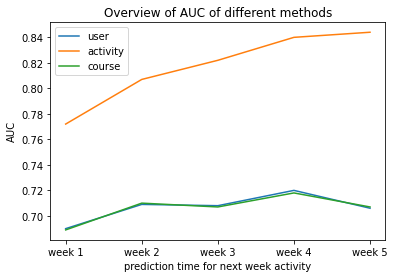

In [314]:
plt.plot(AUCs.iloc[0,1:6], label = AUCs['datatype'][0])
plt.plot(AUCs.iloc[1,1:6], label = AUCs['datatype'][1])
plt.plot(AUCs.iloc[2,1:6], label = AUCs['datatype'][2])
plt.xlabel("prediction time for next week activity")
plt.ylabel("AUC")
#plt.title("Overview of AUC of different methods")
plt.legend()
plt.show()